#  Previsão de Receitas Fictícias com Machine Learning


## 1. Introdução  
- Objetivo: Prever receitas futuras com base em dados históricos e variáveis adicionais como marketing.  
- Descrição: Usamos técnicas de aprendizado de máquina para treinar modelos preditivos e avaliar seu desempenho.

## 2. Importação de Bibliotecas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

## 3. Dados Fictícios

- Estruture todos os dados fictícios de forma clara desde o início.

In [19]:
dados = {
    "Ano": [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028],
    "Receita": [100, 120, 135, 150, 190, 200, 220, 225, 230, 240],
    "Marketing": [50, 55, 60, 70, 80, 90, 100, 105, 110, 115]
}
df = pd.DataFrame(dados)
print(df)

    Ano  Receita  Marketing
0  2019      100         50
1  2020      120         55
2  2021      135         60
3  2022      150         70
4  2023      190         80
5  2024      200         90
6  2025      220        100
7  2026      225        105
8  2027      230        110
9  2028      240        115


## 4. Análise Exploratória

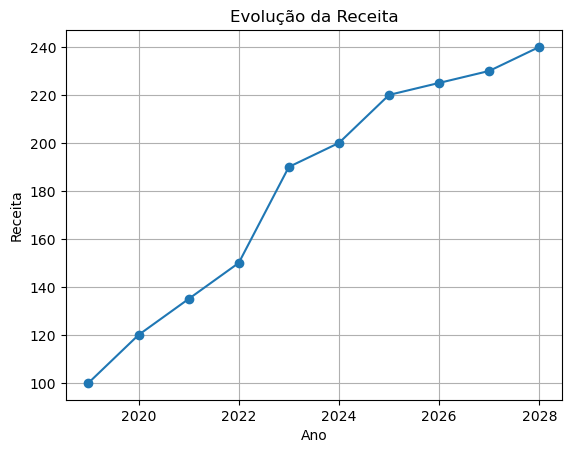

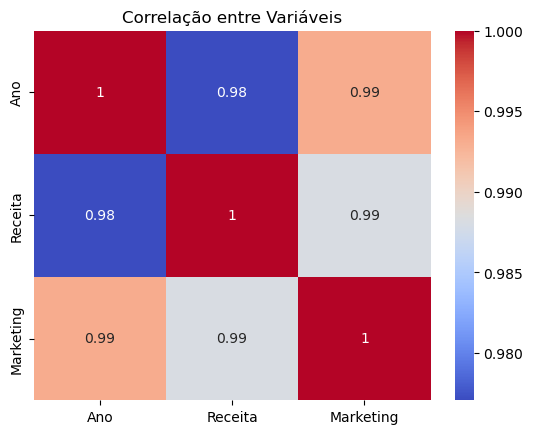

In [23]:
# Gráfico de linha para evolução da receita
plt.plot(df["Ano"], df["Receita"], marker="o")
plt.title("Evolução da Receita")
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.grid(True)
plt.show()

# Heatmap de correlação
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre Variáveis")
plt.show()

## 5. Preparação dos Dados

In [29]:
# Ajustar os dados
x = df[["Ano", "Marketing"]].values
y = df["Receita"].values

# Normalizar os dados
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Dividir os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


## 6. Treinamento e Avaliação do Modelo

- Linear Regression

In [33]:
modelo_lr = LinearRegression()
modelo_lr.fit(x_train, y_train)
y_pred_lr = modelo_lr.predict(x_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")

Linear Regression - MAE: 4.200949367089201, MSE: 28.847164917487696, R²: 0.9904637471347149


- Random Forest Regressor

In [36]:
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(x_train, y_train)
y_pred_rf = modelo_rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MAE: 4.024999999999999, MSE: 21.37624999999998, R²: 0.9929334710743801


## 7. Projeções finais

In [40]:
# Projeções para anos futuros
anos_futuros = [[2029, 120], [2030, 125]]
anos_futuros_scaled = scaler.transform(anos_futuros)

# Usando o melhor modelo (Random Forest)
previsoes_futuras = modelo_rf.predict(anos_futuros_scaled)
print("Previsões para anos futuros:", previsoes_futuras)


Previsões para anos futuros: [234.55 234.55]
